Importando bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Carregando os datasets necessários para a resposta

In [2]:
order_items = pd.read_csv('olist_order_items_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')

In [3]:
orders['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [4]:
orders = orders.loc[orders['order_status'] != 'canceled']
orders.reset_index(drop=True, inplace=True)

In [5]:
orders['order_status'].value_counts()

delivered      96478
shipped         1107
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98816 entries, 0 to 98815
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       98816 non-null  object
 1   customer_id                    98816 non-null  object
 2   order_status                   98816 non-null  object
 3   order_purchase_timestamp       98816 non-null  object
 4   order_approved_at              98797 non-null  object
 5   order_delivered_carrier_date   97583 non-null  object
 6   order_delivered_customer_date  96470 non-null  object
 7   order_estimated_delivery_date  98816 non-null  object
dtypes: object(8)
memory usage: 6.0+ MB


In [7]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98816 entries, 0 to 98815
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       98816 non-null  object        
 1   customer_id                    98816 non-null  object        
 2   order_status                   98816 non-null  object        
 3   order_purchase_timestamp       98816 non-null  datetime64[ns]
 4   order_approved_at              98797 non-null  object        
 5   order_delivered_carrier_date   97583 non-null  object        
 6   order_delivered_customer_date  96470 non-null  object        
 7   order_estimated_delivery_date  98816 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 6.0+ MB


In [8]:
orders['year_month'] = orders['order_purchase_timestamp'].dt.to_period('M')
orders['year_month']

0        2017-10
1        2018-07
2        2018-08
3        2017-11
4        2018-02
          ...   
98811    2017-03
98812    2018-02
98813    2017-08
98814    2018-01
98815    2018-03
Name: year_month, Length: 98816, dtype: period[M]

In [9]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [10]:
orders_price = orders.merge(order_items, on='order_id')

In [11]:
orders_price.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [12]:
columns_to_keep = ['order_id', 'order_status', 'year_month', 'price', 'freight_value']

orders_price = orders_price[columns_to_keep]

In [13]:
orders_price.head()

,order_id,order_status,year_month,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02,19.90,8.72


In [14]:
orders_price = orders_price.drop_duplicates(subset=['order_id'])

In [15]:
orders_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98205 entries, 0 to 112107
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype    
---  ------         --------------  -----    
 0   order_id       98205 non-null  object   
 1   order_status   98205 non-null  object   
 2   year_month     98205 non-null  period[M]
 3   price          98205 non-null  float64  
 4   freight_value  98205 non-null  float64  
dtypes: float64(2), object(2), period[M](1)
memory usage: 4.5+ MB


In [16]:
orders_price['total'] = orders_price['price'] + orders_price['freight_value']
orders_price['total']

0          38.71
1         141.46
2         179.12
3          72.20
4          28.62
           ...  
112102     85.08
112103    195.00
112104    271.01
112105    220.58
112107     86.86
Name: total, Length: 98205, dtype: float64

In [17]:
monthly_sales = orders_price.groupby('year_month')['total'].sum()
monthly_sales

year_month
2016-09        119.48
2016-10      48440.62
2016-12         19.62
2017-01     122837.02
2017-02     261562.74
2017-03     391376.72
2017-04     374971.00
2017-05     534620.26
2017-06     464898.09
2017-07     525712.12
2017-08     601472.28
2017-09     641420.15
2017-10     689600.92
2017-11    1048430.55
2017-12     799434.39
2018-01    1001745.63
2018-02     888355.14
2018-03    1050776.65
2018-04    1054162.53
2018-05    1032799.15
2018-06     927895.27
2018-07     949360.21
2018-08     917992.76
2018-09        166.46
Freq: M, Name: total, dtype: float64

In [18]:
max_value = monthly_sales.max()
min_value = monthly_sales.min()
interval = (max_value - min_value) / 5

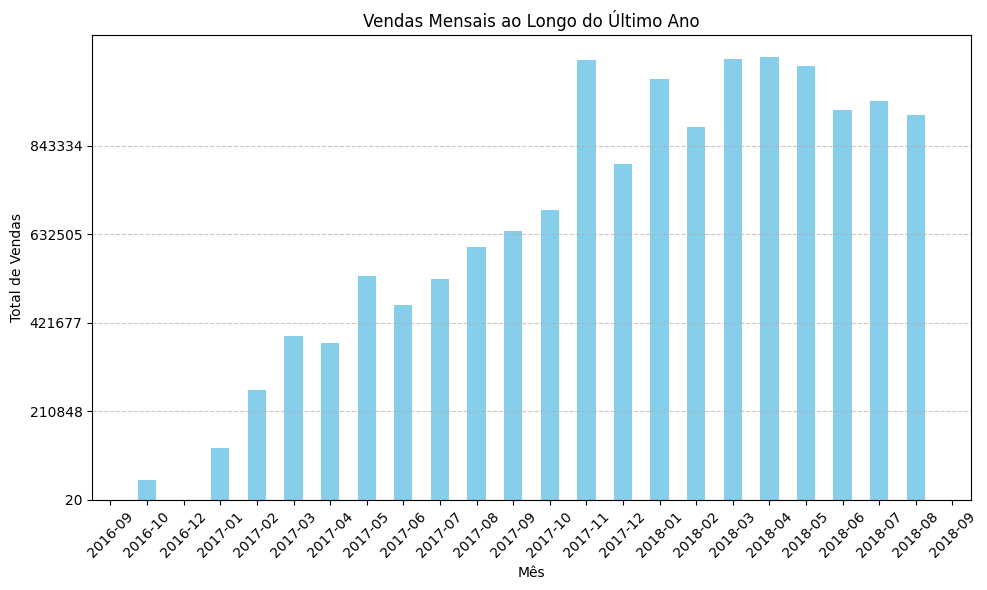

In [19]:
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Vendas Mensais ao Longo do Último Ano')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.yticks(np.arange(min_value, max_value, interval))
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [20]:
order_seller = sellers.merge(order_items, on='seller_id')
order_seller.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.20,9.56
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.70,15.92
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.80,2.42
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-22 04:30:29,89.99,45.09
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f,2017-10-06 02:14:42,199.90,21.89


In [21]:
order_seller = order_seller.drop_duplicates('order_id')

In [22]:
order_seller['total'] = order_seller['price'] + order_seller['freight_value']

In [23]:
seller_receipt = order_seller.groupby('seller_id')['total'].sum()
seller_receipt = seller_receipt.reset_index()
seller_receipt.head()

,seller_id,total
0,0015a82c2db000af6aaaf3ae2ecb0532,2748.06
1,001cca7ae9ae17fb1caed9dfb1094831,28544.74
2,001e6ad469a905060d959994f1b41e4f,267.94
3,002100f778ceb8431b7a1020ff7ab48f,1908.66
4,003554e2dce176b5555353e4f3555ac8,139.38


In [24]:
seller_orders_quantity = order_seller.groupby('seller_id')['order_id'].nunique()
seller_orders_quantity = seller_orders_quantity.reset_index()
seller_orders_quantity.head()

,seller_id,order_id
0,0015a82c2db000af6aaaf3ae2ecb0532,3
1,001cca7ae9ae17fb1caed9dfb1094831,200
2,001e6ad469a905060d959994f1b41e4f,1
3,002100f778ceb8431b7a1020ff7ab48f,51
4,003554e2dce176b5555353e4f3555ac8,1


In [25]:
seller_orders_quantity_sorted = seller_orders_quantity.sort_values(by='order_id', ascending=False)

top_5 = seller_orders_quantity_sorted.head()

bottom_5 = seller_orders_quantity_sorted.tail()

result_quantity = pd.concat([top_5, bottom_5])
result_quantity

,seller_id,order_id
1229,6560211a19b47992c3666cc44a7e94c0,1846
876,4a3ca9315b744ce9f8e9374361493884,1716
2471,cc419e0650a3c5ba77189a1882b7556a,1704
367,1f50f920176fa81dab994f9023523100,1401
2633,da8622b14eb17ae2831f4ac5b9dab84a,1290
2507,cf281cf8b7affbdfe751b29cc85580e1,1
1845,97e50a621f8e801f4baf69e08687c192,1
2509,cf6f6bc4df3999b9c6440f124fb2f687,1
1154,5e25c632f9db6cfb8bc100421c2737b6,1
1485,7963e546f34e098b578f9ad102494601,1


In [26]:
seller_orders_receipt_sorted = seller_receipt.sort_values(by='total', ascending=False)

top_5 = seller_orders_receipt_sorted.head()

bottom_5 = seller_orders_receipt_sorted.tail()

result_receipt = pd.concat([top_5, bottom_5])
result_receipt

,seller_id,total
852,4869f7a5dfa277a7dca6462dcf3b52b2,242362.20
1008,53243585a1d6dc2643021fd1853d8905,219949.85
876,4a3ca9315b744ce9f8e9374361493884,205624.63
3013,fa1c13f2614d7b5c4749cbc52fecda94,203700.37
1553,7e93a43ef30c4f03f38b393420bc753a,182017.96
38,0336182e1b3e92f029d5354832045fdf,19.16
1364,702835e4b785b67a084280efca355756,18.56
864,4965a7002cca77301c82d3f91b82e1a9,16.36
1458,77128dec4bec4878c37ab7d6169d6f26,15.22
2509,cf6f6bc4df3999b9c6440f124fb2f687,12.22


In [27]:
result_receipt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 852 to 2509
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   seller_id  10 non-null     object 
 1   total      10 non-null     float64
dtypes: float64(1), object(1)
memory usage: 240.0+ bytes


In [28]:
max_value_receipt = result_receipt['total'].max()
min_value_receipt = result_receipt['total'].min()
interval_receipt = (max_value_receipt - min_value_receipt) / 5

In [29]:
max_value_quantity = seller_orders_quantity['order_id'].max()
min_value_quantity = seller_orders_quantity['order_id'].min()
interval_quantity = (max_value_quantity - min_value_quantity) / 5

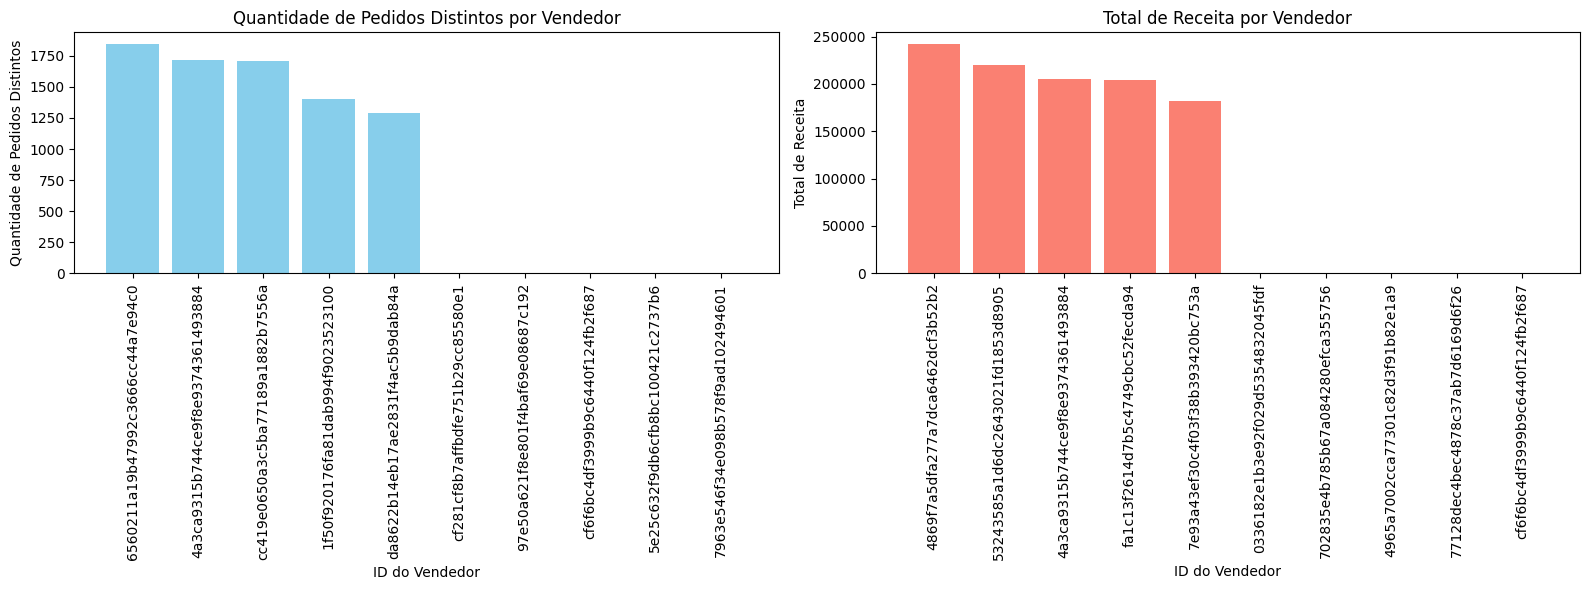

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

axes[0].bar(result_quantity['seller_id'], result_quantity['order_id'], color='skyblue')
axes[0].set_title('Quantidade de Pedidos Distintos por Vendedor')
axes[0].set_xlabel('ID do Vendedor')
axes[0].set_ylabel('Quantidade de Pedidos Distintos')
axes[0].tick_params(axis='x', rotation=90)

axes[1].bar(result_receipt['seller_id'], result_receipt['total'], color='salmon')
axes[1].set_title('Total de Receita por Vendedor')
axes[1].set_xlabel('ID do Vendedor')
axes[1].set_ylabel('Total de Receita')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()

plt.show()


In [31]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [32]:
product_count = order_items.merge(products, on='product_id')
product_count.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0


In [39]:
product_quantity = product_count.groupby('product_id')['order_id'].nunique().reset_index()
product_quantity_top = product_quantity.sort_values(by='order_id', ascending=False).head()
product_quantity_bottom = product_quantity.sort_values(by='order_id', ascending=True).head()
product_quantity = pd.concat([product_quantity_top, product_quantity_bottom])
product_quantity

,product_id,order_id
19742,99a4788cb24856965c36a24e339b6058,467
22112,aca2eb7d00ea1a7b8ebd4e68314663af,431
8613,422879e10f46682990de24d770e7f83d,352
27039,d1c427060a0f73f6b889a5c7c61f2ac4,323
7364,389d119b48cf3043d311335e499d9c6b,311
0,00066f42aeeb9f3007548bb9d3f33c38,1
19086,94b8c08d077273b9896ca6461d4e6e1e,1
19085,94b67faa1e06c405396b019aadf24618,1
19081,94aa4a6893284c0236d6c79c194ef5a6,1
19080,94a75895c8f08d597e9a2d9447170fd4,1


In [43]:
product_quantity_category = product_quantity.merge(products[['product_id', 'product_category_name']], on='product_id')
product_quantity_category

,product_id,order_id,product_category_name
0,99a4788cb24856965c36a24e339b6058,467,cama_mesa_banho
1,aca2eb7d00ea1a7b8ebd4e68314663af,431,moveis_decoracao
2,422879e10f46682990de24d770e7f83d,352,ferramentas_jardim
3,d1c427060a0f73f6b889a5c7c61f2ac4,323,informatica_acessorios
4,389d119b48cf3043d311335e499d9c6b,311,ferramentas_jardim
5,00066f42aeeb9f3007548bb9d3f33c38,1,perfumaria
6,94b8c08d077273b9896ca6461d4e6e1e,1,esporte_lazer
7,94b67faa1e06c405396b019aadf24618,1,perfumaria
8,94aa4a6893284c0236d6c79c194ef5a6,1,papelaria
9,94a75895c8f08d597e9a2d9447170fd4,1,papelaria
